<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [39]:
import pandas as pd
import numpy as np
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import plotly.express as px

In [2]:
data = pd.read_csv('data_clean.csv')

In [3]:
data.shape

(25973, 13)

In [4]:
data.head()

,Unnamed: 0,age,gender,country,education,role,experience_prog,programming_lang_c,experience_ml,industry,company_size,team_size,salary
0,1,50-54,Man,India,Bachelor’s degree,Other,5-10 years,2,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999"
1,2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,4,Under 1 year,Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999"
2,3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,3,No experience,Academics/Education,"1000-9,999 employees",0,0-999
3,4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,1,5-10 years,Academics/Education,"1000-9,999 employees",0,"30,000-39,999"
4,5,45-49,Man,India,Doctoral degree,Other,< 1 years,3,10-20 years,Academics/Education,50-249 employees,5-9,"30,000-39,999"


<AxesSubplot:>

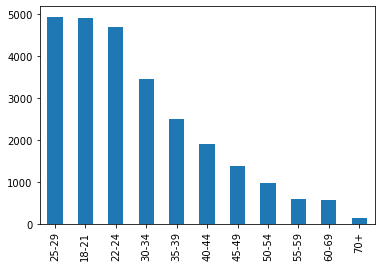

In [42]:
data['age'].value_counts().plot(kind='bar')

In [54]:
px.bar(data["age"].value_counts())

In [52]:
age_ed = data[['age'].value_counts()][data['education'].value_counts()]
#age_ed.sort_values(by='age', ascending=False,inplace=True)
#top_20_pot = pot_players[:10]                       


#fig = px.bar(age_ed, x='education', y='age', color='age', orientation='h',
             #hover_data=['age', 'education'],
             #height=600,
             #title='Top 10 players under 21')
#fig.show()

AttributeError: 'list' object has no attribute 'value_counts'

In [61]:
# data strucutre

dfg=data.groupby('education').count().reset_index()
#dfg=dfg.rename(columns={"User": "Users"})

# plot structure
fig = px.bar(dfg,
             x='age',
             y='education',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

In [ ]:
df3['age','education'] = data['age'].value

In [71]:
df3 = data.groupby(['age', 'education']).size().reset_index(name='counts')

In [72]:
df3

,age,education,counts
0,18-21,Bachelor’s degree,3310
1,18-21,Doctoral degree,17
2,18-21,High school,107
3,18-21,I prefer not to answer,114
4,18-21,Master’s degree,588
...,...,...,...
72,70+,High school,5
73,70+,I prefer not to answer,4
74,70+,Master’s degree,41
75,70+,Professional doctorate,10


In [75]:
fig = px.bar(df3, x='age', y='education', color='counts', orientation='h',
             hover_data=['age', 'education'],
             height=600,
             title='Top 10 players under 21')
fig.show()

In [82]:
# plot structure
fig = px.bar(df6,
             x='age',
             y='education',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['education'] but received: age

In [87]:
df6 = data.groupby('age')['education'].value_counts()
df6 = df6.reset_index(name='count')

In [88]:
df6

,age,education,count
0,18-21,Bachelor’s degree,3310
1,18-21,Some college no bachelor,756
2,18-21,Master’s degree,588
3,18-21,I prefer not to answer,114
4,18-21,High school,107
...,...,...,...
72,70+,Bachelor’s degree,20
73,70+,Professional doctorate,10
74,70+,High school,5
75,70+,I prefer not to answer,4


In [90]:
fig = px.bar(df6,
             x='age',
             y='count',
             title='Test',
             #color='Items',
             barmode='stack')

# plot
fig.show()

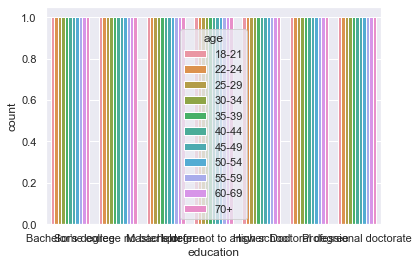

In [92]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='education', hue="age", data=df6)
plt.show()

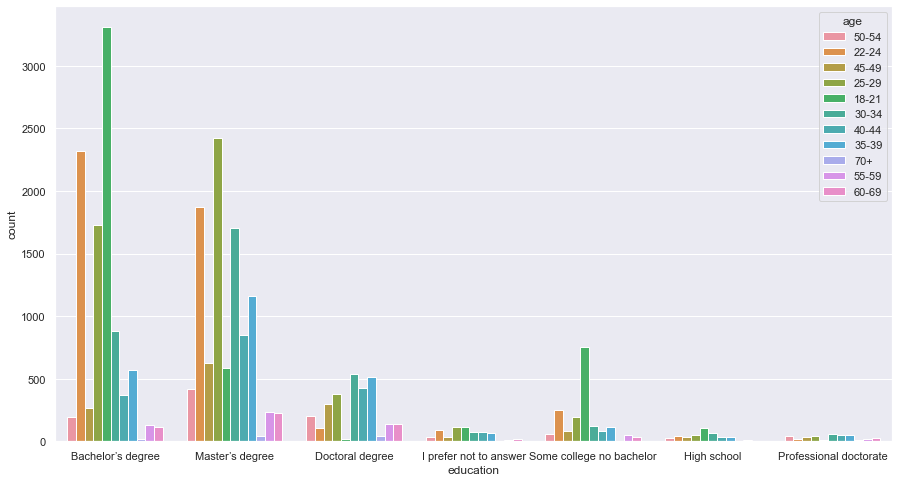

In [99]:
sns.set(style="darkgrid")
plt.figure(figsize = (15,8))
ax = sns.countplot(x='education', hue="age", data=data)
plt.show()

In [106]:
#age_ed = data[['age'].value_counts()][data['education'].value_counts()]
#age_ed.sort_values(by='age', ascending=False,inplace=True)
#top_20_pot = pot_players[:10]                       


#fig = px.bar(age_ed, x='education', y='age', color='age', orientation='h',
             #hover_data=['age', 'education'],
             #height=600,
             #title='Top 10 players under 21')
#fig.show()

df6 = data.groupby('age')['education'].value_counts()
df6 = df6.reset_index(name='count')
df6.sort_values(by='age', ascending=True,inplace=True)

fig = px.bar(df6, x='age', y='education', color='count', orientation='v',
             hover_data=['age', 'education'],
             height=600,
             title='Top 10 players under 21')
fig.show()

In [113]:
fig = px.histogram(df6, y='age', color='education', x='count',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [114]:
df7 = data.groupby('age')['salary'].value_counts()
df7 = df7.reset_index(name='count')

In [121]:
fig = px.histogram(df7, y='age', color='salary', x='count',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [117]:
df8 = data.groupby('gender')['salary'].value_counts()
df8 = df8.reset_index(name='count')

In [128]:
fig = px.histogram(df8, y='count', color='salary', x='gender',
                  color_discrete_sequence=px.colors.qualitative.Set3)
fig.show()

In [133]:
def dist_cat(df):
    for col in df.select_dtypes(np.object):
        fig, axes = plt.subplots(1, figsize=(15, 8))
        sns.countplot(y=df[col], data=df)
        plt.show()

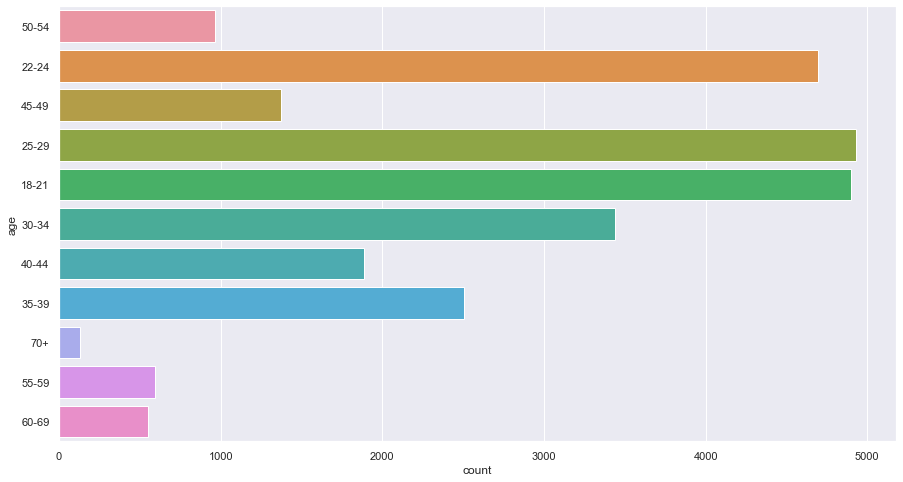

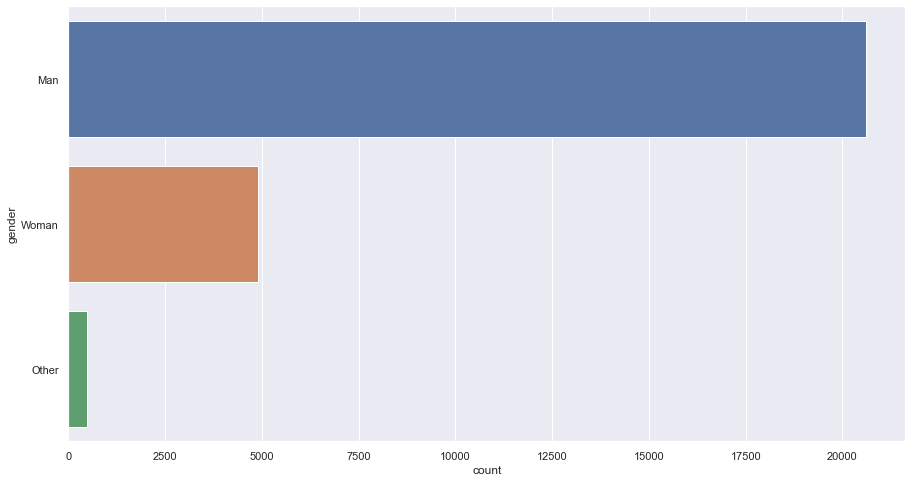

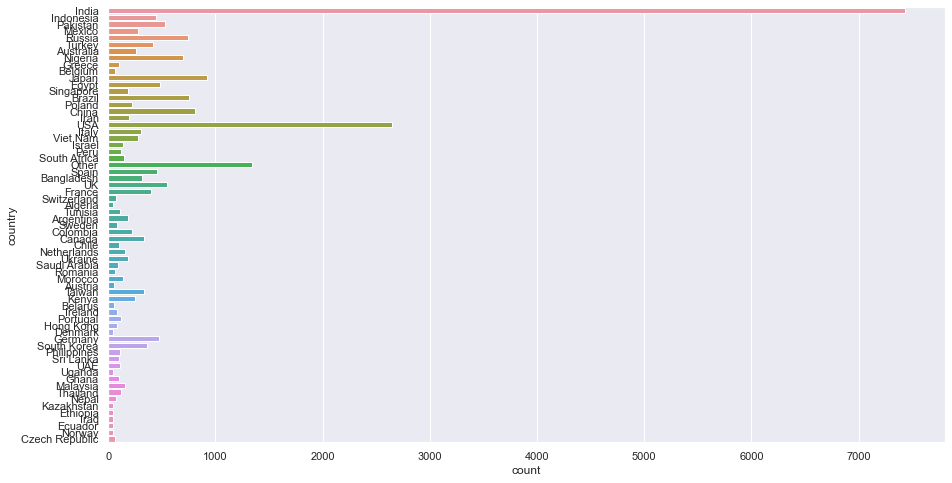

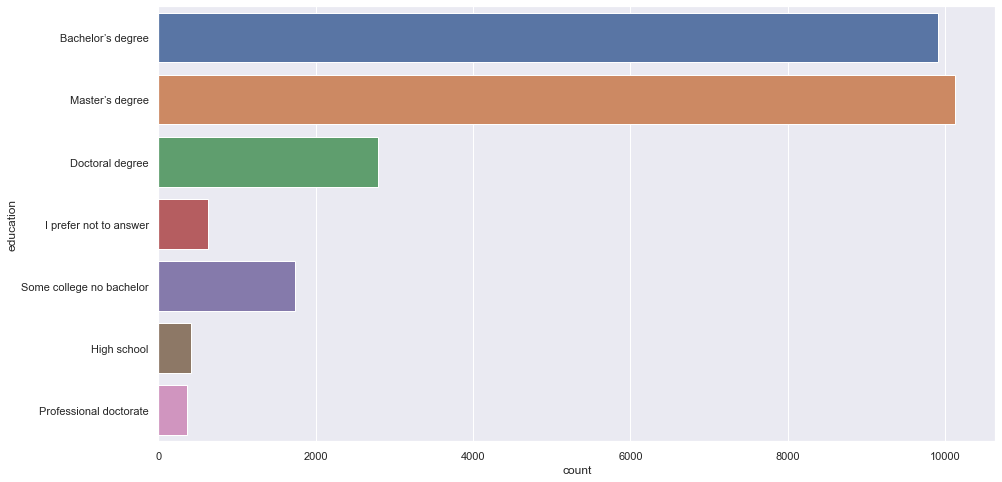

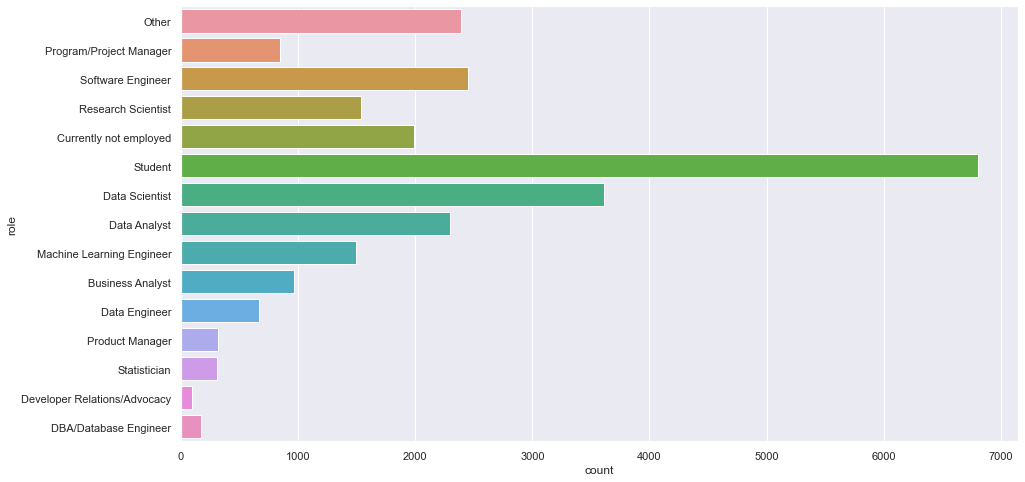

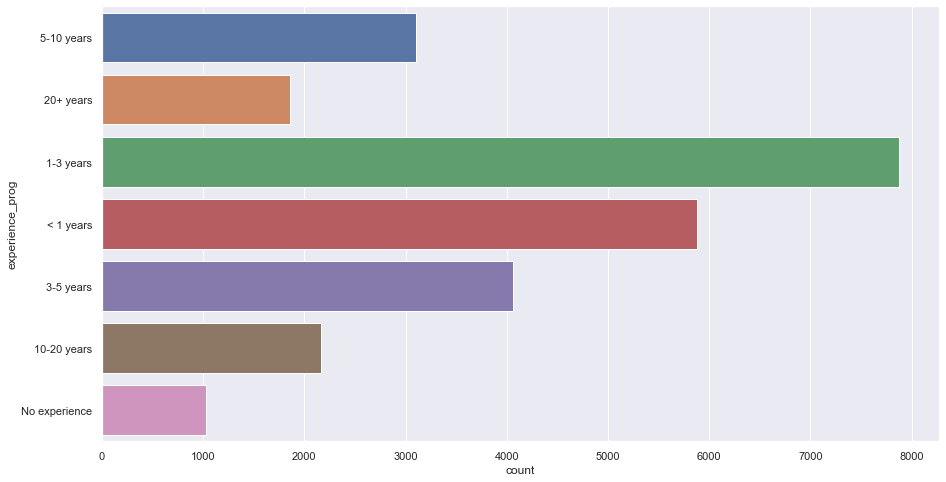

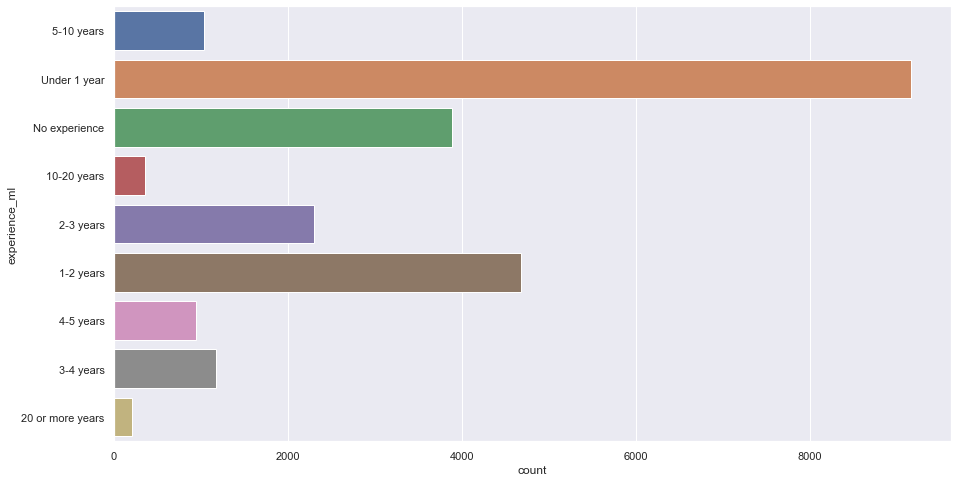

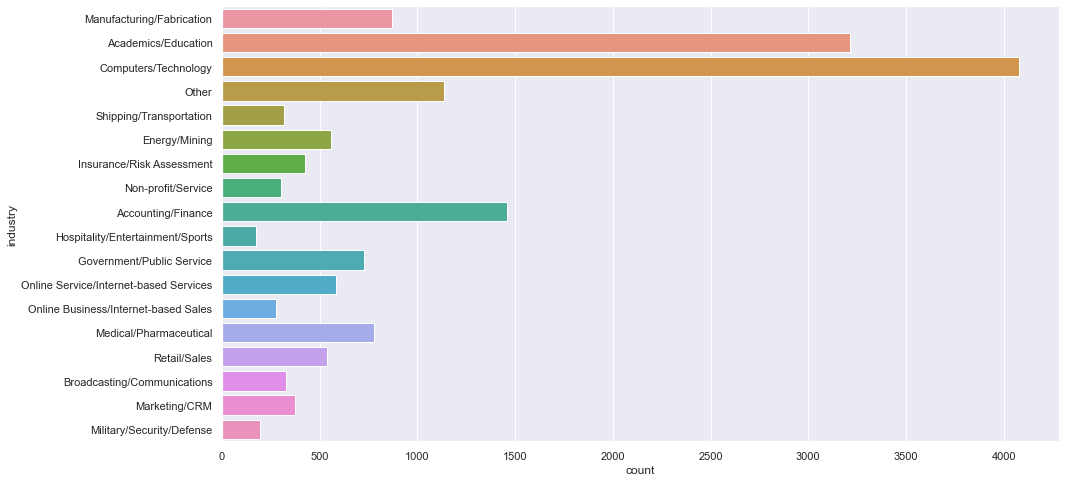

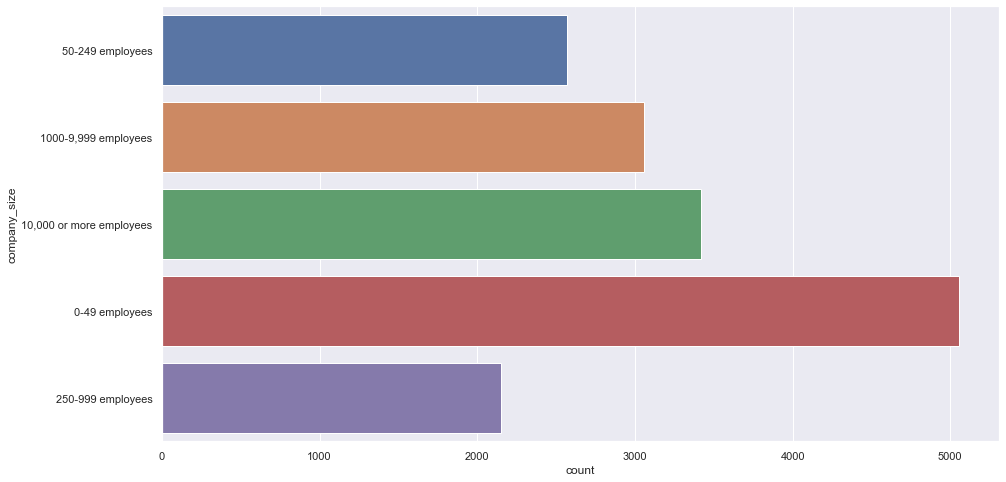

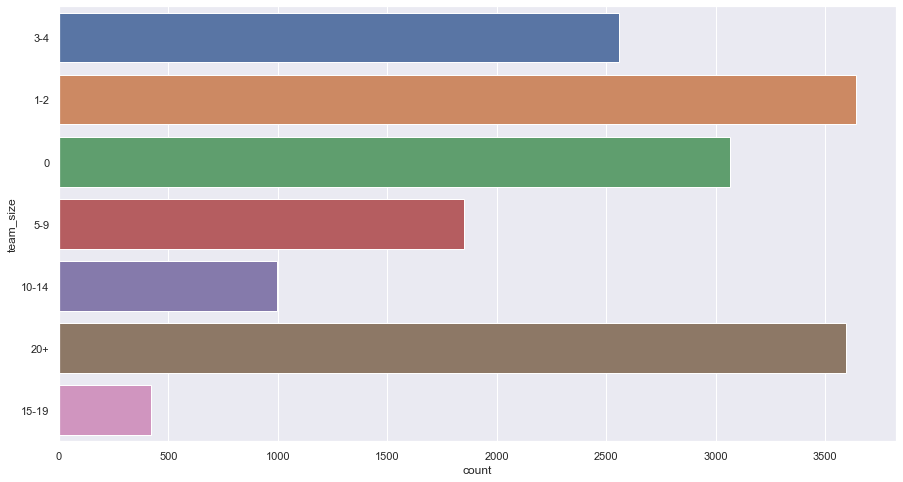

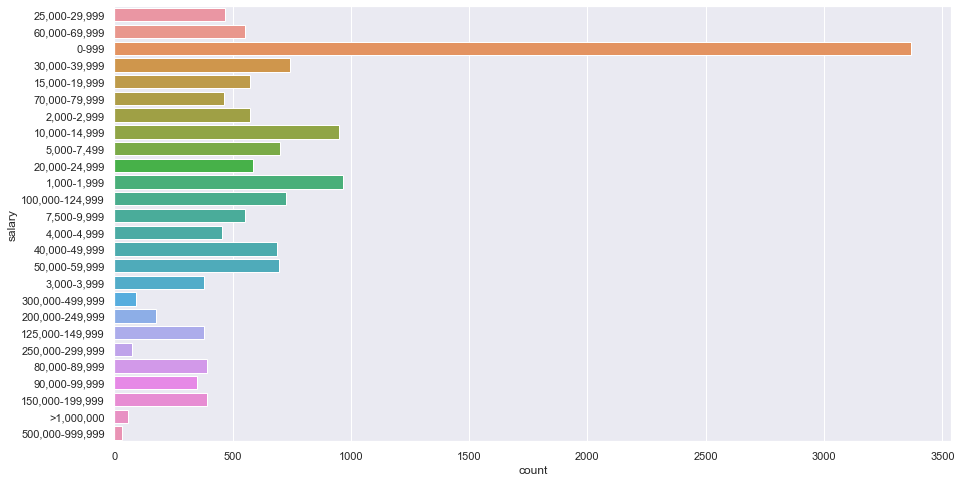

In [134]:
dist_cat(data)